## External Compton

In [1]:
import sys
sys.path.append("../")
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
from agnpy.emission_regions import Blob
from agnpy.targets import SSDisk, SphericalShellBLR
from agnpy.compton import ExternalCompton
import matplotlib.pyplot as plt

In [2]:
# matplotlib adjustments and axes labels
plt.rc("figure", figsize=(7.5, 5.5))
plt.rc("font", size=12)
plt.rc("axes", grid=True)
plt.rc("grid", ls=":")
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

In [3]:
spectrum_norm = 5e42 * u.erg
parameters = {
    "p1": 2.0001,
    "p2": 3.5,
    "gamma_b": 1e4,
    "gamma_min": 20,
    "gamma_max": 5e7,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters}
R_b = 1e16 * u.cm
B = 0.56 * u.G
z = 1
delta_D = 40
Gamma = 40
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
blob.set_gamma_size(600)
gamma = np.logspace(1, 8, 200)
print(f"total number {blob.N_e_tot:.2e}")
print(f"total energy {blob.W_e:.2e}")

normalising broken power-law to total energy density u_e: 1.19e-06 erg / cm3
total number 4.43e+46
total energy 5.00e+42 erg


In [4]:
print(blob)

* spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 1.00
 - d_L (source luminosity distance):2.10e+28 cm
 - delta_D (blob Doppler factor): 4.00e+01
 - Gamma (blob Lorentz factor): 4.00e+01
 - Beta (blob relativistic velocity): 1.00e+00
 - mu_s (cosine of the jet viewing angle): 1.00e+00
 - B (magnetic field tangled to the jet): 5.60e-01 G
 - electron spectra:
  |- normalisation: 5.00e+42 erg
  |- spectral function: BrokenPowerLaw
  |- gamma_min (minimum Lorentz factor): 2.00e+01
  '- gamma_max (maximum Lorentz factor): 5.00e+07


### on Shakura Sunyaev Disk
<img src="figures/figure_8_finke_2016.png" style="float: left;" width="500"/>

In [5]:
# disk parameters
M_sun = const.M_sun.cgs
M_BH = 1.2 * 1e9 * M_sun
R_g = ((const.G * M_BH) / (const.c * const.c)).cgs
L_disk = 2 * 1e46 * u.Unit("erg s-1")
eta = 1 / 12
R_in = 6 * R_g
R_out = 200 * R_g

In [6]:
disk = SSDisk(M_BH, L_disk, eta, R_in, R_out)

In [7]:
print(disk)

* Shakura Sunyaev accretion disk:
 - M_BH (central black hole mass): 2.39e+42 g
 - L_disk (disk luminosity): 2.00e+46 erg / s
 - eta (accretion efficiency): 8.33e-02
 - dot(m) (mass accretion rate): 2.67e+26 g / s
 - R_in (disk inner radius): 1.06e+15 cm
 - R_out (disk inner radius): 3.54e+16 cm


In [8]:
ec_disk_1 = ExternalCompton(blob, disk, r=1e17 * u.cm)
ec_disk_2 = ExternalCompton(blob, disk, r=1e18 * u.cm)
ec_disk_3 = ExternalCompton(blob, disk, r=1e19 * u.cm)

In [9]:
nu = np.logspace(17, 30) * u.Hz

In [10]:
%%timeit
ec_disk_1.sed_flux(nu)

5.54 s ± 230 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


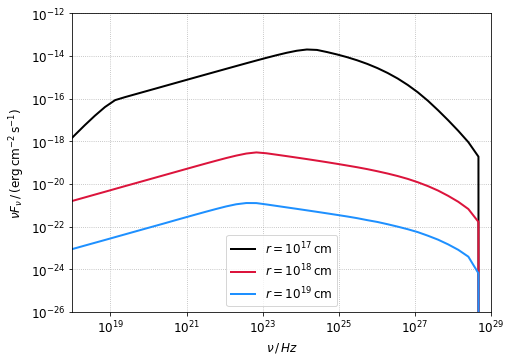

In [17]:
plt.loglog(nu, ec_disk_1.sed_flux(nu), lw=2, color="k", label=r"$r=10^{17}\,{\rm cm}$")
plt.loglog(nu, ec_disk_2.sed_flux(nu), lw=2, color="crimson", label=r"$r=10^{18}\,{\rm cm}$")
plt.loglog(nu, ec_disk_3.sed_flux(nu), lw=2, color="dodgerblue", label=r"$r=10^{19}\,{\rm cm}$")
plt.xlim([1e18, 1e29])
plt.ylim([1e-26, 1e-12])
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()

### on Spherical Shell Broad Line Region
<img src="figures/figure_10_finke_2016.png" style="float: left;" width="500"/>

In [12]:
epsilon_line = 2e-5
csi_line = 0.024
R_line = 1e17 * u.cm
blr = SphericalShellBLR(disk, csi_line, epsilon_line, R_line)

In [13]:
ec_blr_1 = ExternalCompton(blob, blr, r=1e16 * u.cm)
ec_blr_2 = ExternalCompton(blob, blr, r=1e18 * u.cm)
ec_blr_3 = ExternalCompton(blob, blr, r=1e19 * u.cm)

In [14]:
%%timeit
ec_blr_1.sed_flux(nu)

5.07 s ± 98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


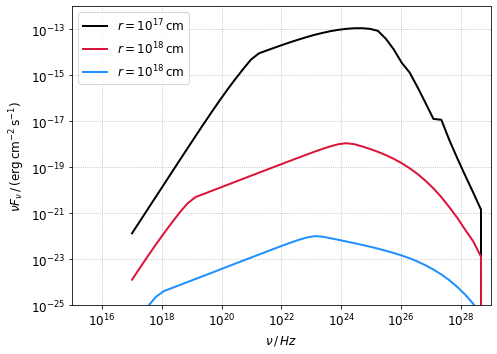

In [19]:
plt.loglog(nu, ec_blr_1.sed_flux(nu), lw=2, color="k", label=r"$r=10^{17}\,{\rm cm}$")
plt.loglog(nu, ec_blr_2.sed_flux(nu), lw=2, color="crimson", label=r"$r=10^{18}\,{\rm cm}$")
plt.loglog(nu, ec_blr_3.sed_flux(nu), lw=2, color="dodgerblue", label=r"$r=10^{18}\,{\rm cm}$")
plt.ylim(1e-25, 1e-12)
plt.xlim(1e15, 1e29)
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()